In [1]:
# displays static in notebook
%matplotlib inline  
# displays interactive outside notebook
#%matplotlib   
# displays interactive in notebook
#%matplotlib notebook  


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.coordinates as coord
import astropy.units as u

#from astropy import units as u
from astropy.coordinates import SkyCoord

folder = ''

mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

0.0 0.0 -1.8622663118779497 -1.7663369995655998 0.9666662589846603 0.19156449896906308 0.66 0.0
1.0 3.267256359733385 1.4049900478554354 1.3062008805794274 -1.0283749532994348 0.06891094548171289 0.66 -1.6165337748745064e-16
2.0 6.53451271946677 4.672246407588821 4.772332862742304 0.9101509100656959 0.440007862260904 0.66 -3.2330675497490127e-16
3.0 9.801769079200156 1.6563174601426205 1.5565173437628674 -0.990563980138067 -0.17787270958751433 0.66 -4.849601324623519e-16
4.0 13.06902543893354 4.923573819876005 5.021508620948847 0.7962664917927532 0.6609112637461281 0.66 -6.466135099498025e-16
5.0 16.336281798666924 1.9076448724298025 1.81312409590211 -0.8896170136514429 -0.4130241673777275 0.66 -8.082668874372532e-16
6.0 19.603538158400312 5.17490123216319 5.264514560872918 0.6360450519545617 0.8428204572389515 0.66 -9.699202649247038e-16


<Figure size 432x288 with 0 Axes>

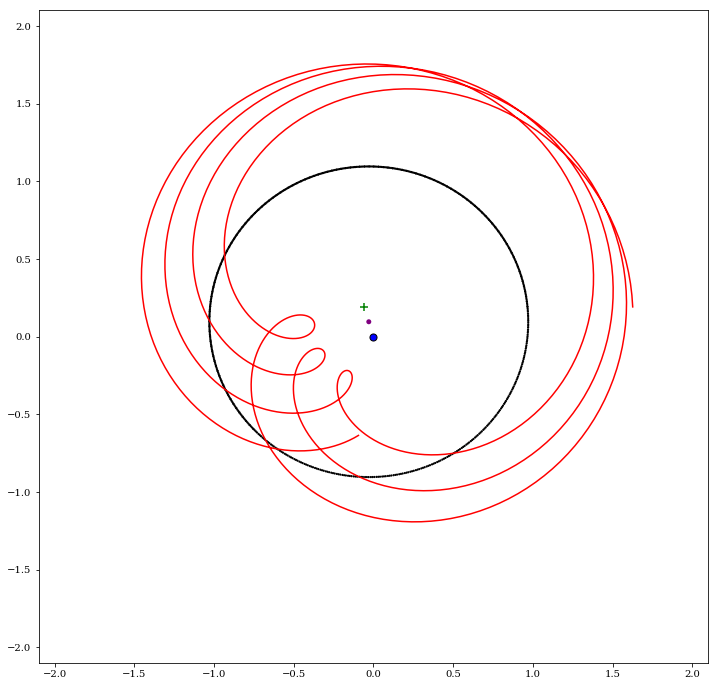

In [2]:
# Mars

planetType = 'superior'  # deferent progresses at omega relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at omega relative to deferent, deferent parallels sun
R_e = 0.66          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.1             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.52  # deferent orbital frequency, measured from equant
apogeeAngle = 106.7   # 
R = 1.0

#USER DEFINABLE TOGGLE
#SUPERIOR planet
deferentRate = motionRate
epicycleRate = 1.0
#INFERIOR planet
#deferentRate = 1.0
#epicycleRate = motionRate



# calculate:
#  earth - Sun direction
#  epicycle-planet line, parallel to earthSun, 
#  equant vector, from equant to epicycle center
#  planet vector, from earth to planet

t = np.arange(0.0,7,0.01)        # time in simulation units, earth years

# calculate angle relative to equant
#omega = 2.0*np.pi * motionRate  # frequency in radian / year
omega = 2.0*np.pi * deferentRate  # frequency in radian / year
omegaT = omega * t - apogeeAngle*np.pi/180.0
while(np.sum(omegaT>2*np.pi) > 0):
    omegaT[omegaT>2*np.pi] += -2*np.pi

# calculate angle relative to center of deferent
alpha = omegaT - np.arcsin(eccentricity  * np.sin(omegaT))

# equant is at eccentricity distance from Earth
# therefore center of deferent is offset by eccentricity
xd = R*np.cos(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.cos(apogeeAngle*np.pi/180.0)  # x along the deferent
yd = R*np.sin(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.sin(apogeeAngle*np.pi/180.0)  # y along the deferent

# motion around epicycle is in time with sun
########  WHY IS A KLUDGE NEEDED (instead of 2.0, a close number to 2)?
xep = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
yep = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

for i in np.arange(len(t)):
    if (i % 100) == 0:
        print(t[i],omega*t[i],omegaT[i],alpha[i],xd[i],yd[i],xep[i],yep[i])
    

# top down view of geometry

plt.clf()
plt.figure(figsize=(12,12))
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*np.arcsin(np.sin(alpha)), c = 'black', s = 5, edgecolors = 'none')
plt.scatter(xd,yd, c = 'black', s = 5, edgecolors = 'none')
plt.scatter([eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'purple', s = 25, edgecolors = 'none')
plt.scatter([2*eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[2*eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'green', s = 50, marker='+')
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')
plt.plot(xd+xep,yd+yep, c = 'red',linestyle='-')   # add the position of the center of the epicycle and the planet's position around the epicycle

#plt.ylabel('angles [degrees]')


In [3]:
print(0.21 % 0.1)

0.009999999999999981


<Figure size 432x288 with 0 Axes>

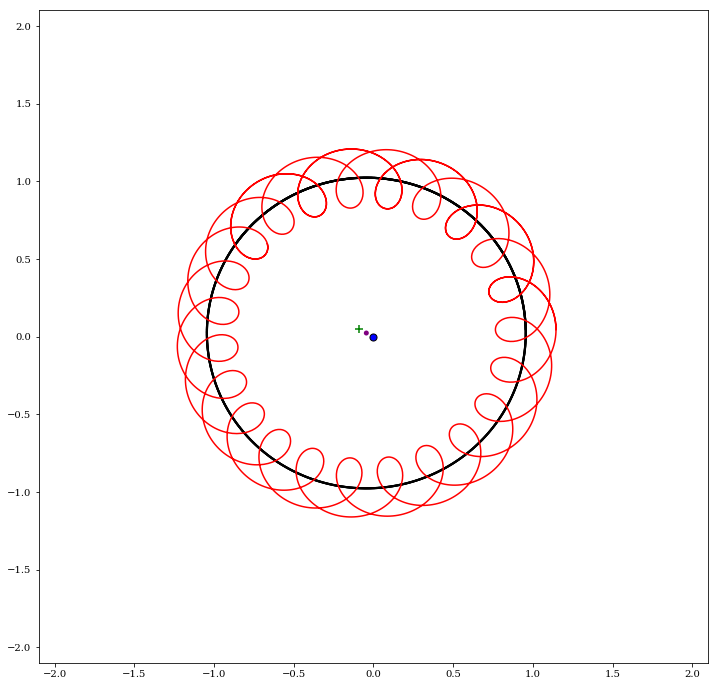

In [4]:
# Jupiter

planetType = 'superior'  # deferent progresses at omega relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at omega relative to deferent, deferent parallels sun
R_e = 0.19          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.05             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.08  # deferent orbital frequency, measured from equant
apogeeAngle = 152.2   # 
R = 1.0

#superior planet
deferentRate = motionRate
epicycleRate = 1.0

# calculate:
#  earth - Sun direction
#  epicycle-planet line, parallel to earthSun, 
#  equant vector, from equant to epicycle center
#  planet vector, from earth to planet

t = np.arange(0.0,30,0.01)        # time in simulation units, earth years

# calculate angle relative to equant
#omega = 2.0*np.pi * motionRate  # frequency in radian / year
omega = 2.0*np.pi * deferentRate  # frequency in radian / year
omegaT = omega * t - apogeeAngle*np.pi/180.0
while(np.sum(omegaT>2*np.pi) > 0):
    omegaT[omegaT>2*np.pi] += -2*np.pi

# calculate angle relative to center of deferent
alpha = omegaT - np.arcsin(eccentricity  * np.sin(omegaT))

# equant is at eccentricity distance from Earth
# therefore center of deferent is offset by eccentricity
xd = R*np.cos(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.cos(apogeeAngle*np.pi/180.0)  # x along the deferent
yd = R*np.sin(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.sin(apogeeAngle*np.pi/180.0)  # y along the deferent

# motion around epicycle is in time with sun
########  WHY IS A KLUDGE NEEDED (instead of 2.0, a close number to 2)?
xep = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
yep = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

#for i in np.arange(len(t)):
#    if (i % 100) == 0:
#        print(t[i],omega*t[i],omegaT[i],alpha[i],xd[i],yd[i],xep[i],yep[i])
    
    
# top down view of geometry

plt.clf()
plt.figure(figsize=(12,12))
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*np.arcsin(np.sin(alpha)), c = 'black', s = 5, edgecolors = 'none')
plt.scatter(xd,yd, c = 'black', s = 5, edgecolors = 'none')
plt.scatter([eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'purple', s = 25, edgecolors = 'none')
plt.scatter([2*eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[2*eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'green', s = 50, marker='+')
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')
plt.plot(xd+xep,yd+yep, c = 'red',linestyle='-')

#plt.ylabel('angles [degrees]')


<Figure size 432x288 with 0 Axes>

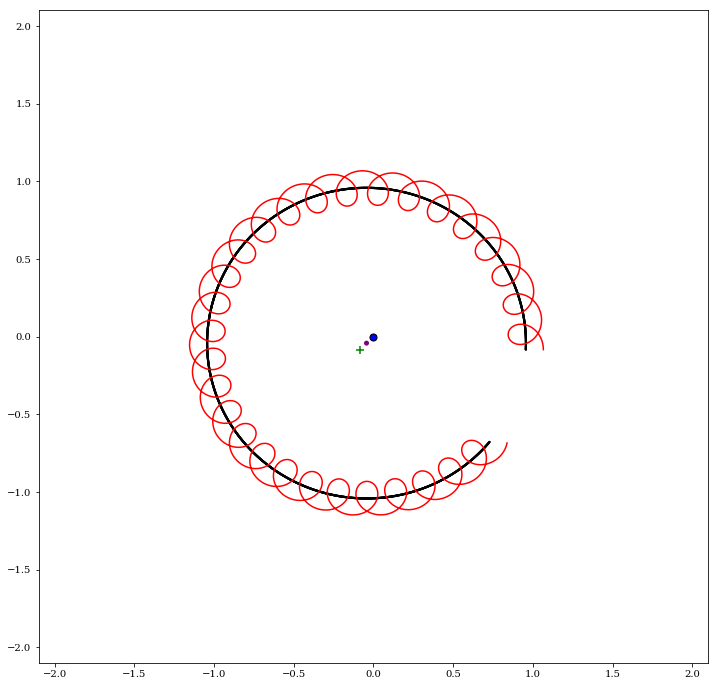

In [5]:
# Saturn

planetType = 'superior'  # deferent progresses at omega relative to equant, epicycle parallels sun
#planetType = 'inferior'  # epicycle progresses at omega relative to deferent, deferent parallels sun
R_e = 0.11          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.06             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
motionRate = 0.03  # deferent orbital frequency, measured from equant
apogeeAngle = 224.2  # 
R = 1.0


#superior planet
deferentRate = motionRate
epicycleRate = 1.0

# calculate:
#  earth - Sun direction
#  epicycle-planet line, parallel to earthSun, 
#  equant vector, from equant to epicycle center
#  planet vector, from earth to planet

t = np.arange(0.0,30,0.01)        # time in simulation units, earth years

# calculate angle relative to equant
#omega = 2.0*np.pi * motionRate  # frequency in radian / year
omega = 2.0*np.pi * deferentRate  # frequency in radian / year
omegaT = omega * t - apogeeAngle*np.pi/180.0
while(np.sum(omegaT>2*np.pi) > 0):
    omegaT[omegaT>2*np.pi] += -2*np.pi

# calculate angle relative to center of deferent
alpha = omegaT - np.arcsin(eccentricity  * np.sin(omegaT))

# equant is at eccentricity distance from Earth
# therefore center of deferent is offset by eccentricity
xd = R*np.cos(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.cos(apogeeAngle*np.pi/180.0)  # x along the deferent
yd = R*np.sin(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.sin(apogeeAngle*np.pi/180.0)  # y along the deferent

# motion around epicycle is in time with sun
########  WHY IS A KLUDGE NEEDED (instead of 2.0, a close number to 2)?
xep = R_e*np.cos(2.0*np.pi*epicycleRate*t)           # x along the epicycle
yep = R_e*np.sin(2.0*np.pi*epicycleRate*t)           # y along the epicycle

#for i in np.arange(len(t)):
#    if (i % 100) == 0:
#        print(t[i],omega*t[i],omegaT[i],alpha[i],xd[i],yd[i],xep[i],yep[i])
    
    
# top down view of geometry

plt.clf()
plt.figure(figsize=(12,12))
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*np.arcsin(np.sin(alpha)), c = 'black', s = 5, edgecolors = 'none')
plt.scatter(xd,yd, c = 'black', s = 5, edgecolors = 'none')
plt.scatter([eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'purple', s = 25, edgecolors = 'none')
plt.scatter([2*eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[2*eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'green', s = 50, marker='+')
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')
plt.plot(xd+xep,yd+yep, c = 'red',linestyle='-')

#plt.ylabel('angles [degrees]')


<Figure size 432x288 with 0 Axes>

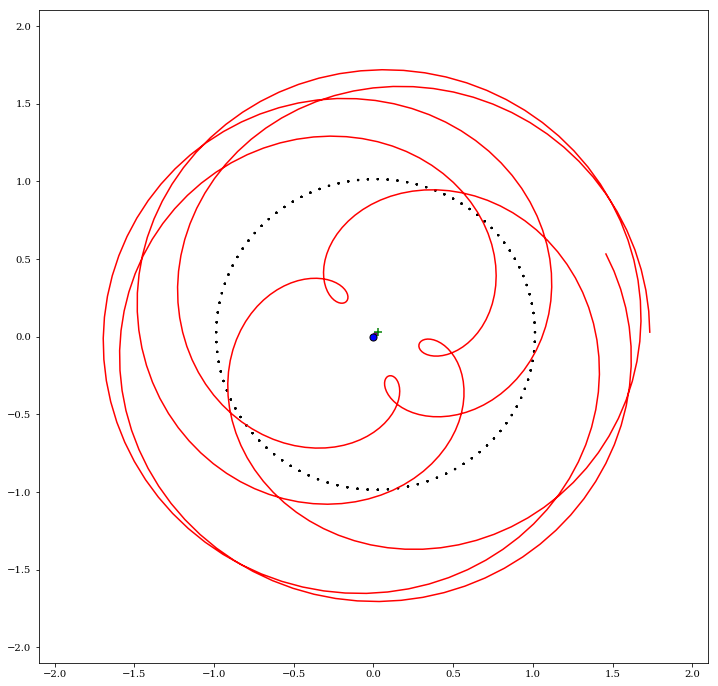

In [6]:
# Venus

#planetType = 'superior'  # deferent progresses at omega relative to equant, epicycle parallels sun
planetType = 'inferior'  # epicycle progresses at omega relative to deferent, deferent parallels sun
R_e = 0.72          # epicycle radius, relative to deferent radius.  0 to 0.75
eccentricity = 0.02             # eccentricity 0 to 0.2, separation between Earth and equant as fraction of deferent
#MOTION RATE IS USED DIFFERENTLY FOR INFERIOR PLANETS
motionRate = 1.6  # epicycle orbital frequency, measured from deferent
apogeeAngle = 46.2   # 
R = 1.0

#inferior planet
deferentRate = 1.0
epicycleRate = motionRate

# calculate:
#  earth - Sun direction
#  epicycle-planet line, parallel to earthSun, 
#  equant vector, from equant to epicycle center
#  planet vector, from earth to planet

t = np.arange(0.0,5,0.01)        # time in simulation units, earth years

# calculate angle relative to equant
#omega = 2.0*np.pi * motionRate  # frequency in radian / year
omega = 2.0*np.pi * deferentRate  # frequency in radian / year
omegaT = omega * t - apogeeAngle*np.pi/180.0
while(np.sum(omegaT>2*np.pi) > 0):
    omegaT[omegaT>2*np.pi] += -2*np.pi

# calculate angle relative to center of deferent
alpha = omegaT - np.arcsin(eccentricity  * np.sin(omegaT))

# equant is at eccentricity distance from Earth
# therefore center of deferent is offset by eccentricity
xd = R*np.cos(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.cos(apogeeAngle*np.pi/180.0)  # x along the deferent
yd = R*np.sin(alpha + apogeeAngle*np.pi/180.0) + eccentricity * np.sin(apogeeAngle*np.pi/180.0)  # y along the deferent

# motion around epicycle is in time with sun
########  WHY IS THIS KLUDGE NEEDED?
xep = R_e*np.cos(2.04*np.pi*epicycleRate*t)           # x along the epicycle
yep = R_e*np.sin(2.04*np.pi*epicycleRate*t)           # y along the epicycle

#for i in np.arange(len(t)):
#    if (i % 100) == 0:
#        print(t[i],omega*t[i],omegaT[i],alpha[i],xd[i],yd[i],xep[i],yep[i])
    

# top down view of geometry
#plt.clf()
#plt.figure(figsize=(8,8))
#plt.xlim(np.min(t),np.max(t))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*omegaT, c = 'black', s = 5, edgecolors = 'none')
#plt.scatter(t,180.0/np.pi*alpha, c = 'red', s = 5, edgecolors = 'none')
#plt.ylabel('angles [degrees]')


# top down view of geometry

plt.clf()
plt.figure(figsize=(12,12))
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
#plt.ylim(1.1 * np.min([r2,Y2,0]), 1.1 * np.max([r1,X1,Y1]))
#plt.xlabel('time [years]')

#plt.scatter(t,180.0/np.pi*np.arcsin(np.sin(alpha)), c = 'black', s = 5, edgecolors = 'none')
plt.scatter(xd,yd, c = 'black', s = 5, edgecolors = 'none')
plt.scatter([eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'purple', s = 25, edgecolors = 'none')
plt.scatter([2*eccentricity * np.cos(apogeeAngle*np.pi/180.0)],[2*eccentricity * np.sin(apogeeAngle*np.pi/180.0)], c = 'green', s = 50, marker='+')
plt.scatter([0],[0], c = 'blue', s = 50, edgecolors = 'black')
plt.plot(xd+xep,yd+yep, c = 'red',linestyle='-')

#plt.ylabel('angles [degrees]')
